Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels') 

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
diabetes_train |> glimpse()

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 4, 10, 1, 8, 1, 13, 5, 5, 3, 10,…
$ Glucose                  <dbl> 85, 89, 116, 115, 110, 139, 103, 99, 97, 145,…
$ BloodPressure            <dbl> 66, 66, 74, 0, 92, 80, 30, 84, 66, 82, 92, 75…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 0, 38, 0, 15, 19, 0, 26, 11,…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 0, 83, 0, 140, 110, 0, 0, 54,…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 37.6, 27.1, 43.3, 35.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.191, 1.441, 0.1…
$ Age                      <dbl> 31, 21, 30, 29, 30, 57, 33, 50, 22, 57, 38, 6…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

In logistic regression, the outcome variable has to be binary (two classes). In this example, the variable *Outcome* has values of 0 and 1. Zero (0) indicates the patient does not have diabetes (a negative result), and one (1) indicates the patient does have diabetes (a positive result).

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)$^2$)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

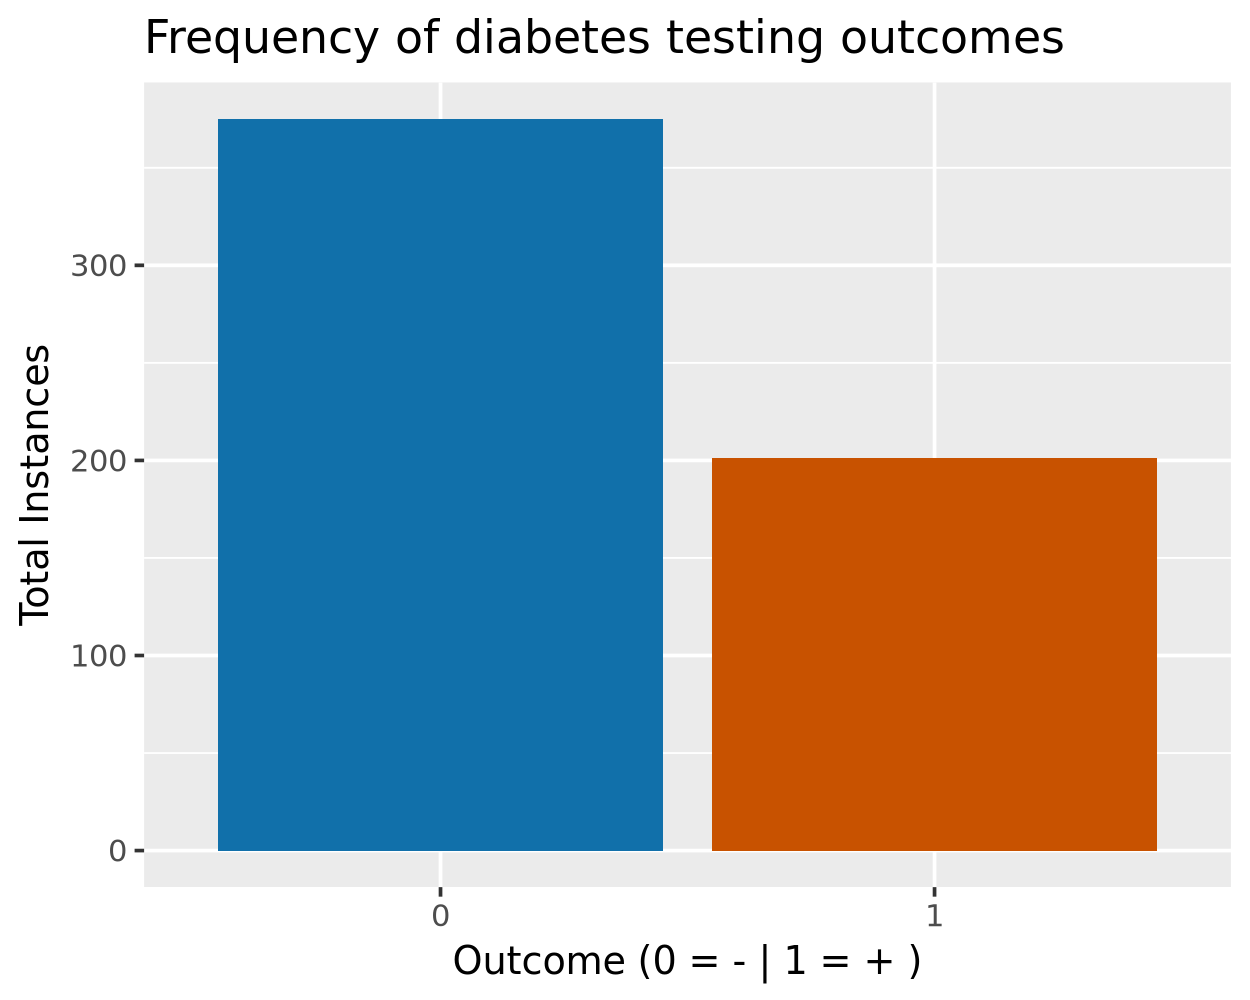

In [4]:
outcome_freq = ggplot(diabetes_train, aes(x = Outcome)) +
                geom_bar(fill = c('#1170aa', '#c85200')) +
                labs(title = 'Frequency of diabetes testing outcomes',
                     x = "Outcome (0 = - | 1 = + )",y = "Total Instances", color = "Outcome")

outcome_freq

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

The dataset is not balanced. There are almost 50% more patients who tested negative for diabetes than positive.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [5]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

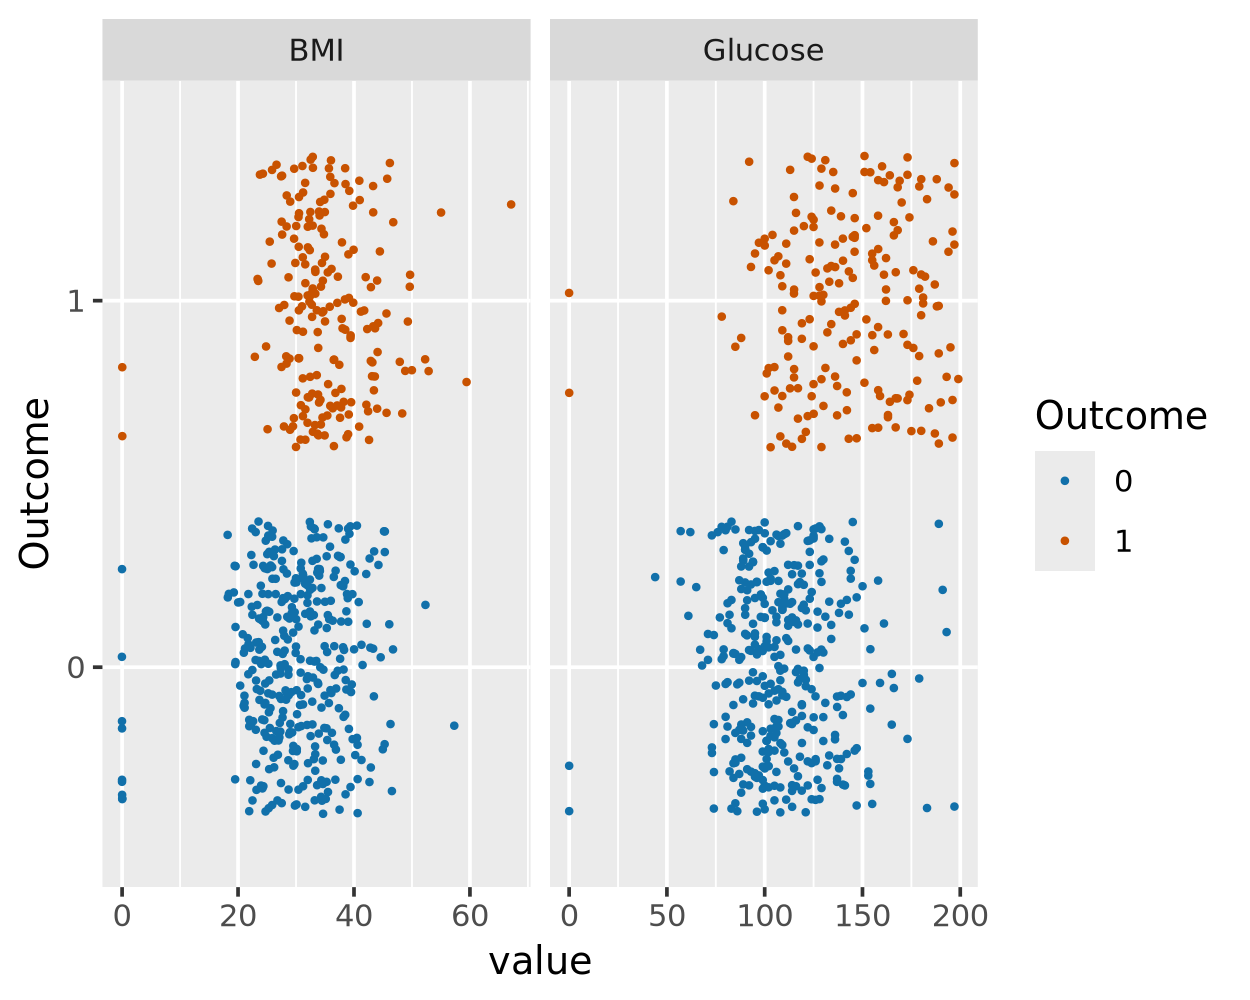

In [8]:
diabetes_scat_plt = ggplot(plot_df, aes(x = value, y = Outcome)) +
                        geom_jitter(size = 0.5, aes(color=Outcome)) +
                        scale_color_manual(values=c('#1170aa', '#c85200')) +
                        facet_wrap(~name, ncol = 2, scales = 'free_x')

diabetes_scat_plt

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

The *scales='free_x'* argument allows different x-axis scales to be implemented given the variation in the range of values for each variable. By removing this argument, the graphs represented in the facet wrapping have the same scale, altering the appearance and thereby affecting the readability of the graph. 

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for your engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [9]:
mod = logistic_reg() |> set_engine('glm')

mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data = diabetes_train)

tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.76333693,0.69816555,-11.119622,1.006979e-28
BMI,0.07113170,0.01495735,4.755636,1.978224e-06
Glucose,0.03862401,0.00397707,9.711674,2.688839e-22


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [10]:
diabetes_test_wPred = augment(mod_fit, diabetes_test)

diabetes_test_wPred  |> head()

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.4150708,0.58492916,6,148,72,35,0,33.6,0.627,50,1
1,0.2764329,0.72356715,8,183,64,0,0,23.3,0.672,32,1
1,0.1933323,0.80666768,10,168,74,0,0,38.0,0.537,34,1
1,0.4869710,0.51302904,0,118,84,47,230,45.8,0.551,31,1
0,0.5252874,0.47471259,3,126,88,41,235,39.3,0.704,27,0
0,0.9423729,0.05762715,6,92,92,0,0,19.9,0.188,28,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [11]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 106  35
         1  19  32

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

Sixty-seven (67) patients had diabetes, but only thirty-two (32) were predicted to have diabetes. Nineteen (19) predictions were false positives, patients were predicted to have diabetes but did not.